In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"E:\ny_housing_project\data\NY-House-Dataset-Cleaned.csv")


In [82]:
df.head()

BROKERTITLE      PRICE  BEDS       BATH  PROPERTYSQFT  \
0  douglas elliman     315000     2   2.000000        1400.0   
1          serhant  195000000     7  10.000000       17545.0   
2       sowae corp     260000     4   2.000000        2015.0   
3          compass      69000     3   1.000000         445.0   
4        sotheby's   55000000     7   2.373861       14175.0   

                                   FORMATTED_ADDRESS   LATITUDE  LONGITUDE  \
0  Regis Residence, 2 E 55th St #803, New York, N...  40.761255 -73.974483   
1             217 W 57th St, New York, NY 10019, USA  40.766393 -73.980991   
2     620 Sinclair Ave, Staten Island, NY 10312, USA  40.541805 -74.196109   
3               2 E 55th St, New York, NY 10022, USA  40.761398 -73.974613   
4               5 E 64th St, New York, NY 10065, USA  40.767224 -73.969856   

    STATUS PROPERTY_TYPE  segment    BOROUGH    ZIP  
0  unknown         condo   Normal  Manhattan  10022  
1  unknown         condo   Luxury  Manhattan  10019  
2  unknown         house   Normal  Manhattan  10312  
3  unknown         condo  Outlier  Manhattan  10022  
4  unknown     townhouse   Luxury  Manhattan  10065

In [83]:
df_normal = df[df['segment'] == 'Normal']
df_luxury = df[df['segment'] == 'Luxury']
df_Outlier  = df[df['segment'] == 'Outlier']

In [85]:
df_normal['BOROUGH'].value_counts()

BOROUGH
Manhattan        1784
Brooklyn          359
Queens            269
Bronx             120
Staten Island      52
Name: count, dtype: int64

In [86]:
df_normal

BROKERTITLE    PRICE  BEDS      BATH  PROPERTYSQFT  \
0            douglas elliman   315000     2  2.000000        1400.0   
2                 sowae corp   260000     4  2.000000        2015.0   
7               pantiga  inc   265000     1  1.000000         750.0   
8              century 21 mk   440000     2  1.000000         978.0   
9     engel volkers americas   375000     2  1.000000         850.0   
...                      ...      ...   ...       ...           ...   
3014                 serhant   789000     3  2.373861         800.0   
3016    brown harris stevens   945000     2  2.000000         903.0   
3017                  re/max  2999999    15  9.000000        3600.0   
3018                 e  corp   598125     2  1.000000         655.0   
3019             nyc brokers   349000     1  1.000000         750.0   

                                      FORMATTED_ADDRESS   LATITUDE  LONGITUDE  \
0     Regis Residence, 2 E 55th St #803, New York, N...  40.761255 -73.974483   
2        620 Sinclair Ave, Staten Island, NY 10312, USA  40.541805 -74.196109   
7     Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...  40.821586 -73.874089   
8          1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA  40.615738 -73.969694   
9         800 Grand Concourse #2j, Bronx, NY 10451, USA  40.824870 -73.922983   
...                                                 ...        ...        ...   
3014   109 Lafayette St RM 502, New York, NY 10013, USA  40.717926 -74.000594   
3016  2351 Adam Clayton Powell Jr Blvd Apartment 614...  40.816711 -73.942050   
3017            2825 W 15th St, Brooklyn, NY 11224, USA  40.578450 -73.982739   
3018     91-23 Corona Ave. #4b, Flushing, NY 11373, USA  40.742770 -73.872752   
3019      460 Neptune Ave #14a, Brooklyn, NY 11224, USA  40.579147 -73.970949   

       STATUS      PROPERTY_TYPE segment    BOROUGH    ZIP  
0     unknown              condo  Normal  Manhattan  10022  
2     unknown              house  Normal  Manhattan  10312  
7     unknown              co op  Normal      Bronx  10473  
8     unknown              co op  Normal   Brooklyn  11230  
9     unknown              co op  Normal      Bronx  10451  
...       ...                ...     ...        ...    ...  
3014  unknown              condo  Normal  Manhattan  10013  
3016  unknown              condo  Normal  Manhattan  10030  
3017  unknown  multi family home  Normal  Manhattan  11224  
3018  unknown              condo  Normal     Queens  11373  
3019  unknown              co op  Normal   Brooklyn  11224  

[2584 rows x 13 columns]

# 1. Exploratory Data Analysis (EDA)

## 2.1. Univariate Analysis


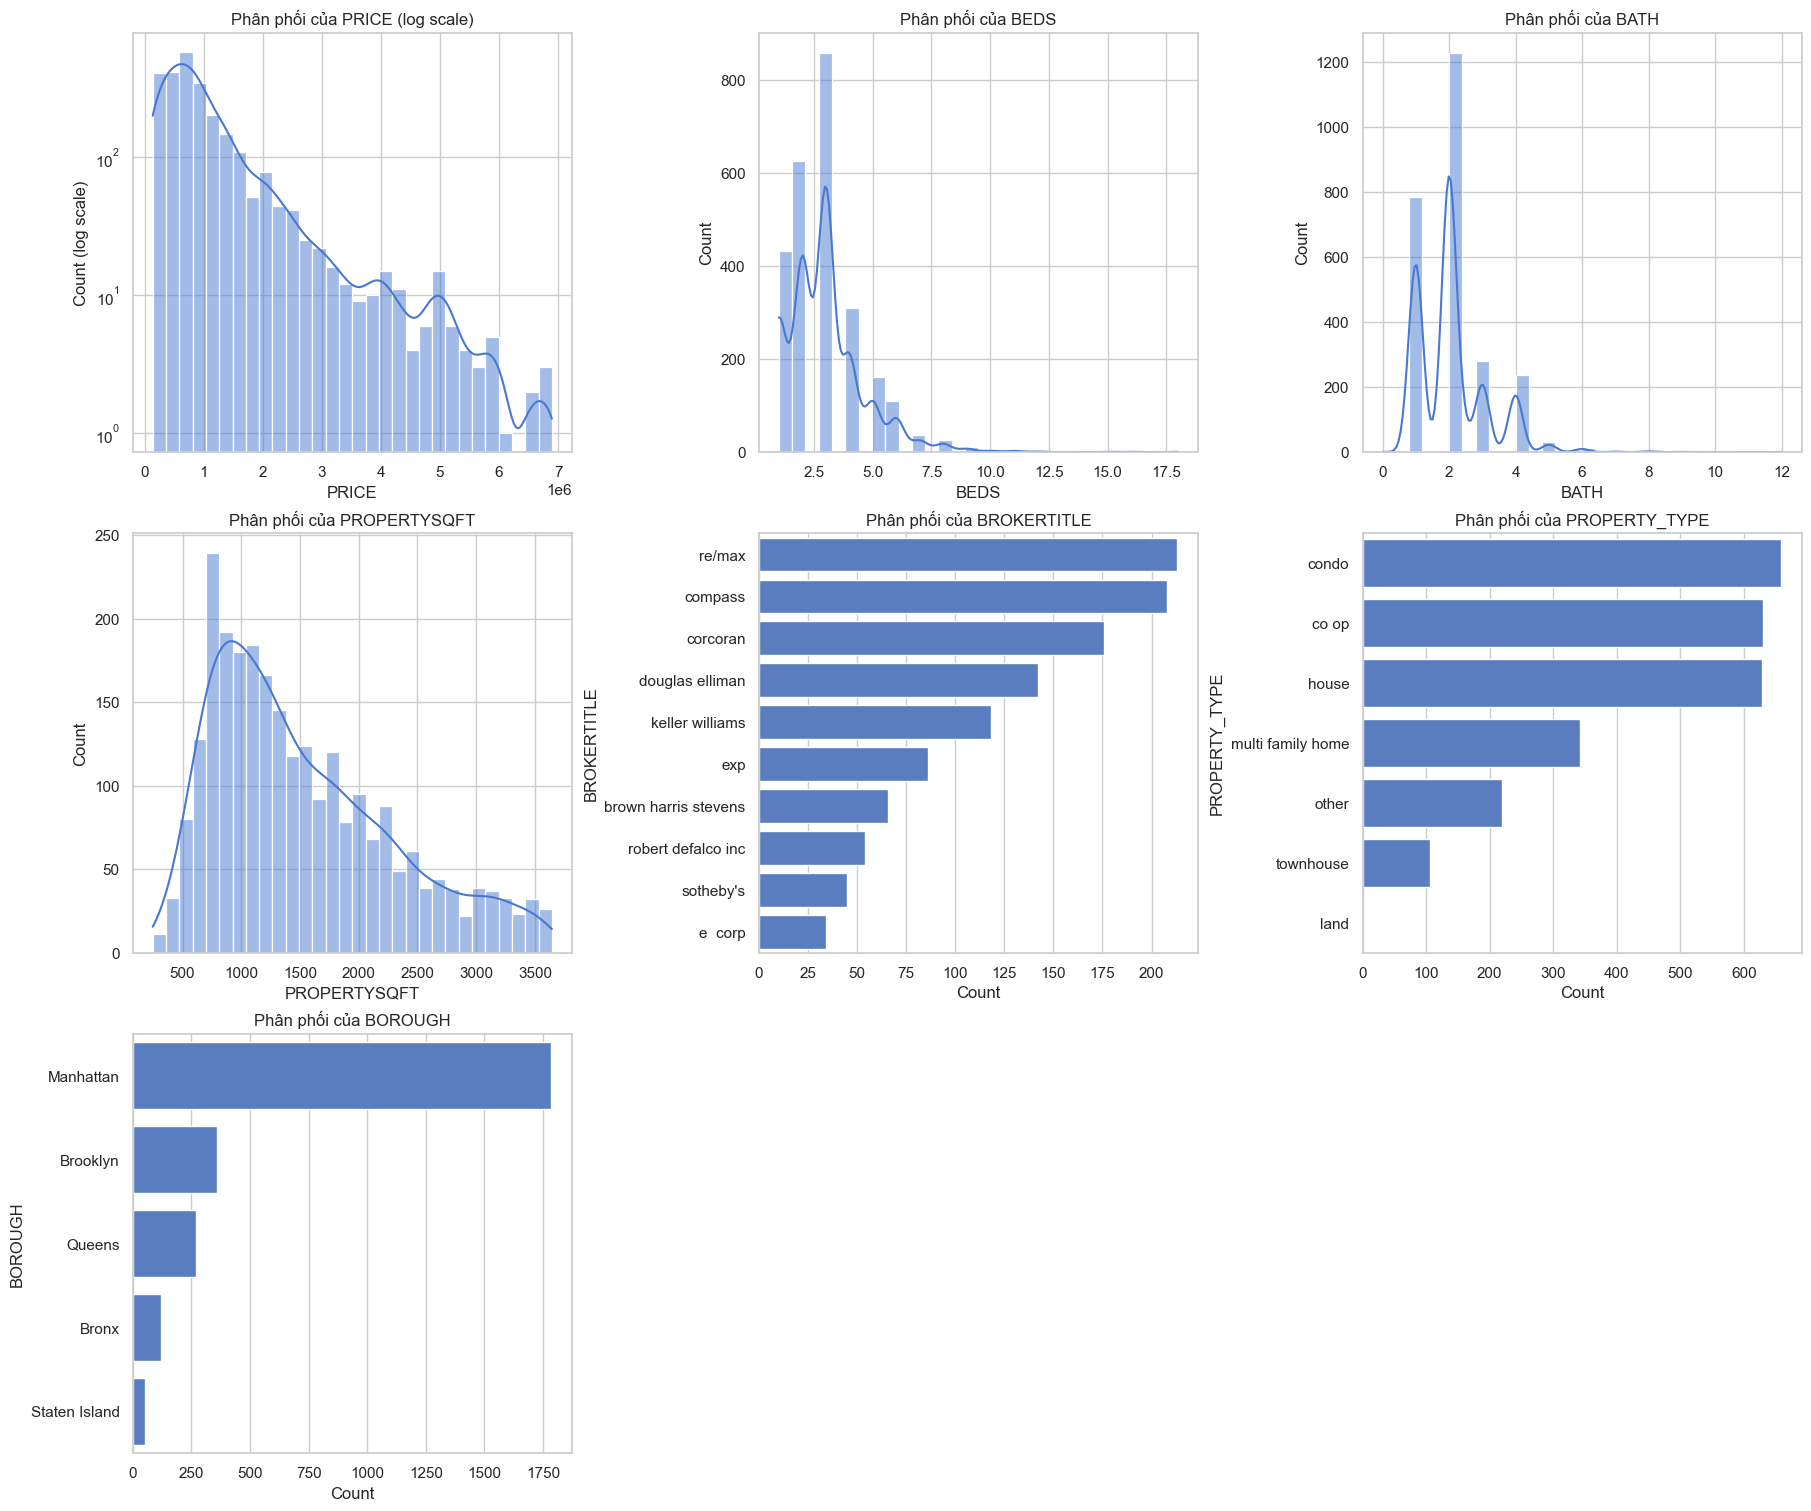

In [105]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log')  # Log scale cho PRICE
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_normal, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


## 1. Ph√¢n ph·ªëi gi√° nh√† (PRICE)
- Gi√° nh√† ph√¢n b·ªë **l·ªách ph·∫£i m·∫°nh** (right-skewed).  
- Hai c·ª•m gi√° ch√≠nh xu·∫•t hi·ªán:
  - **0.5M ‚Äì 1M USD**: chi·∫øm ƒëa s·ªë.
  - **1.5M ‚Äì 2M USD**: t·∫°o th√†nh c·ª•m ph·ª•, th∆∞·ªùng l√† cƒÉn h·ªô/townhouse ·ªü Manhattan ho·∫∑c Brooklyn.  
- Gi√° tr√™n 2.5M gi·∫£m d·∫ßn nh∆∞ng v·∫´n c√≥ m·ªôt s·ªë tr∆∞·ªùng h·ª£p cao ƒë·∫øn g·∫ßn 7M (v·∫´n n·∫±m trong ph√¢n kh√∫c Normal, ch∆∞a t√≠nh Luxury).  

## 2. Ph√¢n ph·ªëi s·ªë ph√≤ng ng·ªß (BEDS)
- Ph·∫ßn l·ªõn nh√† c√≥ **2‚Äì3 ph√≤ng ng·ªß**, ƒë√∫ng v·ªõi ph√¢n kh√∫c ƒë·∫°i ch√∫ng.  
- S·ªë l∆∞·ª£ng nh√† t·ª´ 5 ph√≤ng tr·ªü l√™n gi·∫£m m·∫°nh, hi·∫øm g·∫∑p.  

## 3. Ph√¢n ph·ªëi s·ªë ph√≤ng t·∫Øm (BATH)
- T∆∞∆°ng t·ª± ph√≤ng ng·ªß, ph·ªï bi·∫øn nh·∫•t l√† **1‚Äì2 ph√≤ng t·∫Øm**.  
- T·ª´ 4 ph√≤ng t·∫Øm tr·ªü l√™n r·∫•t √≠t ‚Üí ch·ªß y·∫øu thu·ªôc nh√≥m di·ªán t√≠ch l·ªõn, gi√° cao h∆°n.  

## 4. Ph√¢n ph·ªëi di·ªán t√≠ch (PROPERTYSQFT)
- Ph·ªï bi·∫øn trong kho·∫£ng **500 ‚Äì 1500 sqft**, ph√π h·ª£p h·ªô gia ƒë√¨nh nh·ªè/ trung b√¨nh.  
- C√≥ m·ªôt ‚Äúƒëu√¥i d√†i‚Äù v·ªõi di·ªán t√≠ch >2000 sqft, th∆∞·ªùng n·∫±m ·ªü nh√≥m gi√° cao h∆°n.  

## 5. Ph√¢n ph·ªëi theo m√¥i gi·ªõi (BROKERTITLE)
- M·ªôt s·ªë broker l·ªõn chi·∫øm ∆∞u th·∫ø: **RE/MAX, Compass, Corcoran, Douglas Elliman, Keller Williams**.  
- C√°c broker n√†y chi ph·ªëi ph·∫ßn l·ªõn ngu·ªìn cung tr√™n th·ªã tr∆∞·ªùng.  

## 6. Ph√¢n ph·ªëi theo lo·∫°i nh√† (PROPERTY_TYPE)
- Ch·ªß y·∫øu l√† **condo, co-op, house**.  
- C√°c lo·∫°i townhouse, multi-family home, land chi·∫øm t·ª∑ l·ªá nh·ªè h∆°n.  

## 7. Ph√¢n ph·ªëi theo khu v·ª±c (BOROUGH)
- **Manhattan √°p ƒë·∫£o** v·ªÅ s·ªë l∆∞·ª£ng listing.  
- Theo sau l√† **Brooklyn, Queens**, trong khi Bronx v√† Staten Island ch·ªâ chi·∫øm t·ª∑ tr·ªçng nh·ªè.  

---

### üîë Insight ch√≠nh t·ª´ ph√¢n t√≠ch ƒë∆°n bi·∫øn
1. **Gi√° nh√† ph·ªï th√¥ng ·ªü NYC chia l√†m hai c·ª•m ch√≠nh**: 0.5M‚Äì1M v√† 1.5M‚Äì2M.  
2. **2‚Äì3 ph√≤ng ng·ªß, 1‚Äì2 ph√≤ng t·∫Øm, di·ªán t√≠ch 500‚Äì1500 sqft** l√† ƒë·∫∑c tr∆∞ng chung.  
3. **Condo v√† co-op** l√† lo·∫°i h√¨nh chi·∫øm ∆∞u th·∫ø ‚Üí ph·∫£n √°nh nhu c·∫ßu th·ªã tr∆∞·ªùng ƒë√¥ th·ªã.  
4. **Manhattan l√† trung t√¢m** c·ªßa th·ªã tr∆∞·ªùng Normal segment, c·∫£ v·ªÅ s·ªë l∆∞·ª£ng v√† gi√° tr·ªã.  
5. Th·ªã tr∆∞·ªùng b·ªã chi ph·ªëi m·∫°nh b·ªüi **m·ªôt s·ªë broker l·ªõn**.  



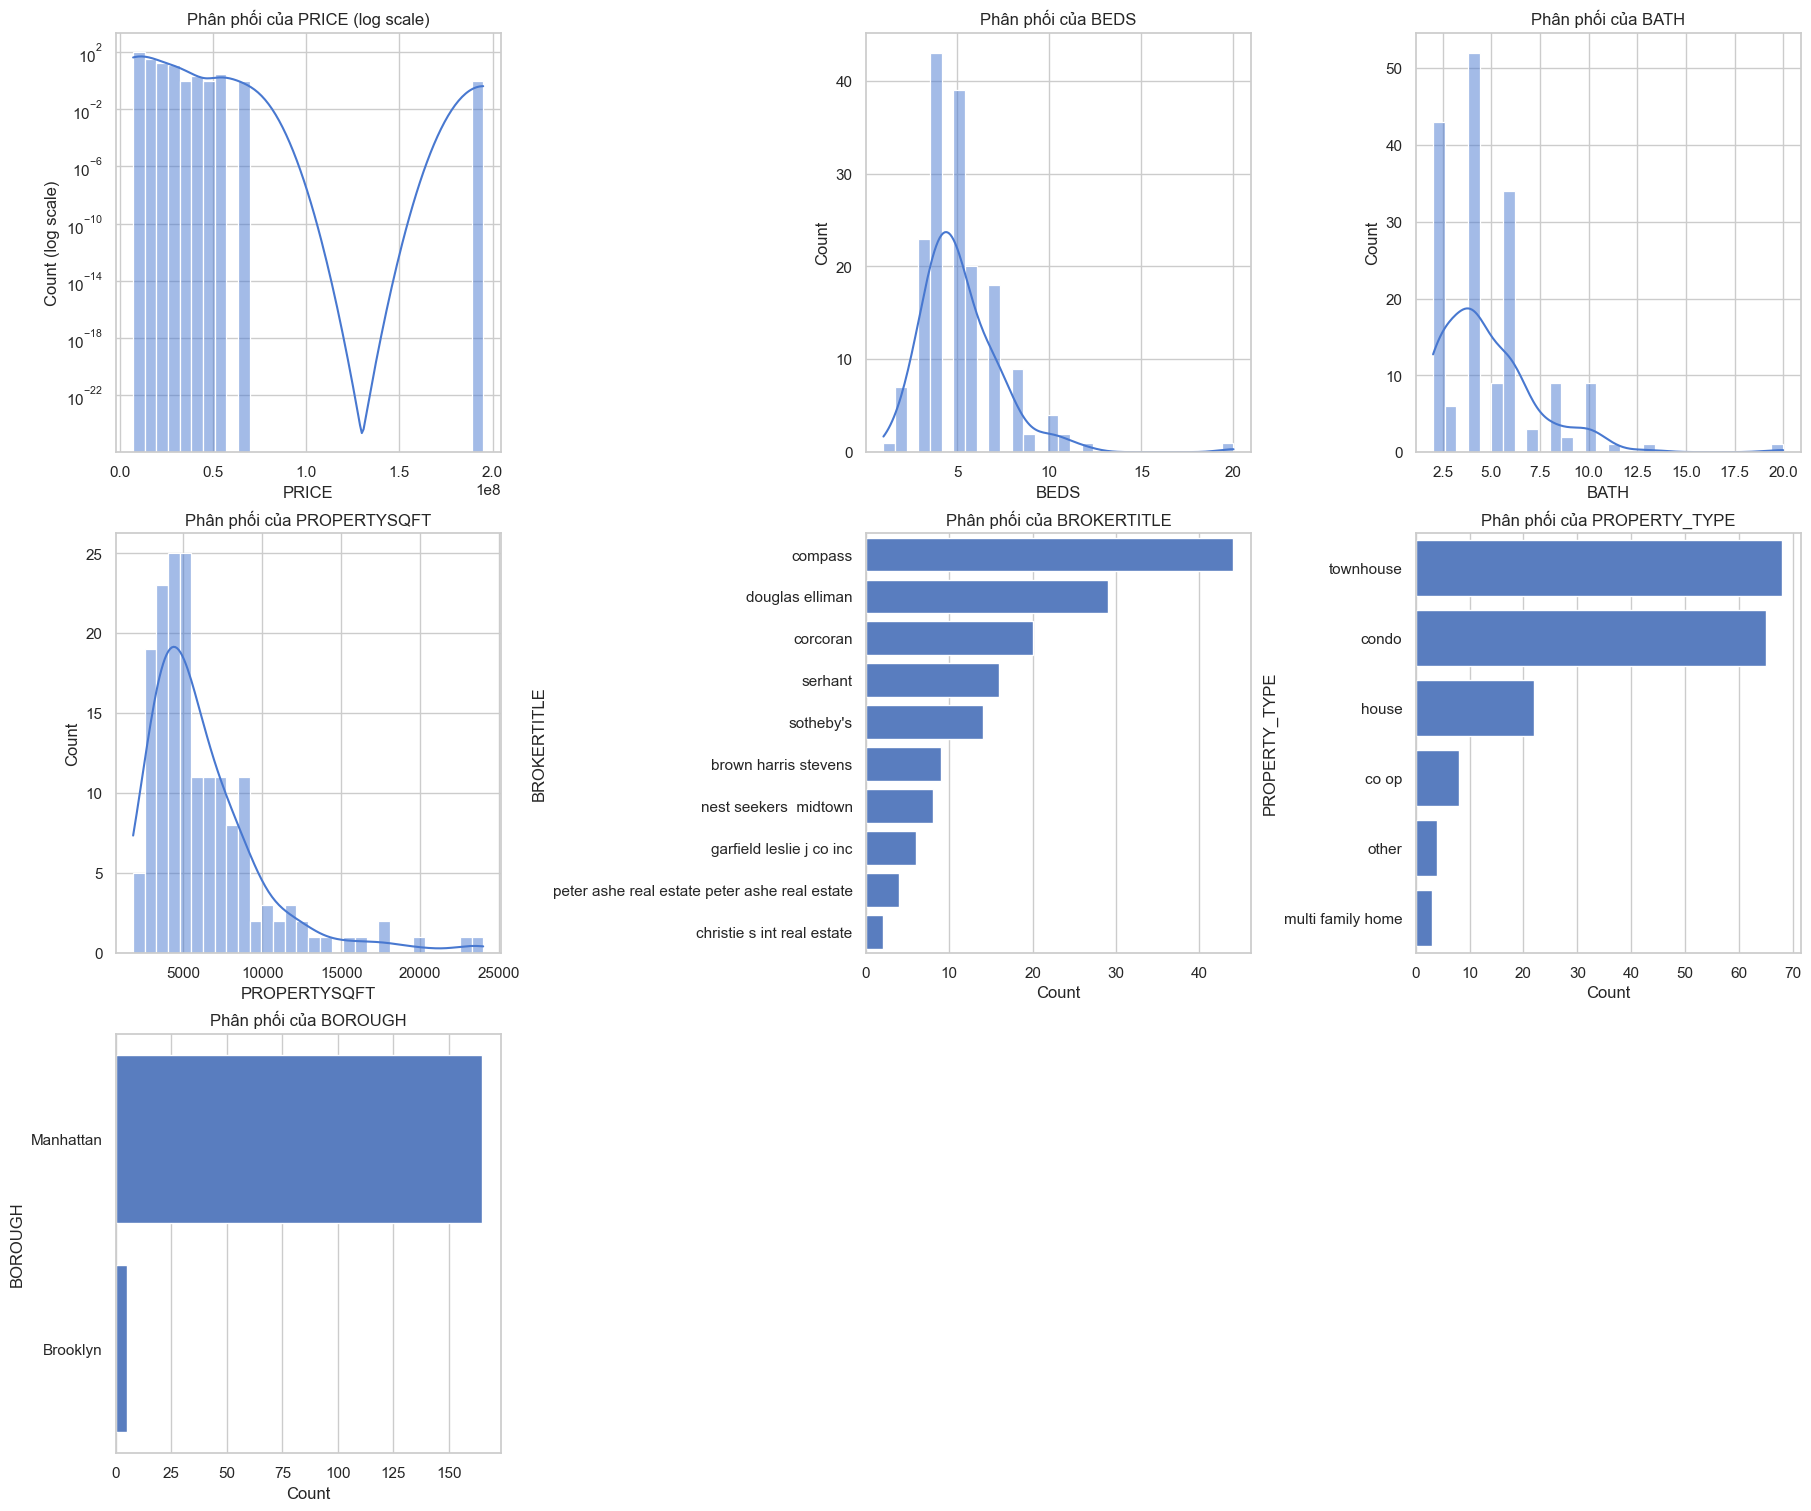

In [106]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log')  # Log scale cho PRICE
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Ph√¢n ph·ªëi c·ªßa {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh s√°ch c√°c c·ªôt
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# V·∫Ω bi·ªÉu ƒë·ªì theo l∆∞·ªõi 3 c·ªôt
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# V·∫Ω t·ª´ng c·ªôt
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 1. Ph√¢n ph·ªëi gi√° nh√† (PRICE)
- Gi√° nh√† luxury tr·∫£i r·ªông t·ª´ **5M ƒë·∫øn g·∫ßn 200M USD**.  
- Ph√¢n ph·ªëi l·ªách ph·∫£i, nh∆∞ng kh√°c v·ªõi Normal, ph·∫ßn ƒëu√¥i k√©o d√†i t·ªõi h√†ng trƒÉm tri·ªáu USD.  
- Xu·∫•t hi·ªán r√µ r·ªát m·ªôt s·ªë **cƒÉn si√™u sang (super luxury)** tr√™n 50M, k√©o trung b√¨nh gi√° l√™n cao.  

### 2. Ph√¢n ph·ªëi s·ªë ph√≤ng ng·ªß (BEDS)
- Ph·ªï bi·∫øn t·ª´ **3‚Äì6 ph√≤ng ng·ªß**.  
- Xu·∫•t hi·ªán m·ªôt s·ªë cƒÉn bi·ªát th·ª±/townhouse c√≥ **10+ ph√≤ng ng·ªß**, hi·∫øm nh∆∞ng ƒë·∫∑c tr∆∞ng cho ph√¢n kh√∫c n√†y.  

### 3. Ph√¢n ph·ªëi s·ªë ph√≤ng t·∫Øm (BATH)
- ƒêa s·ªë c√≥ **3‚Äì6 ph√≤ng t·∫Øm**, ƒëi k√®m v·ªõi s·ªë ph√≤ng ng·ªß l·ªõn.  
- M·ªôt s·ªë √≠t tr∆∞·ªùng h·ª£p c·ª±c ƒëoan c√≥ tr√™n 10 ph√≤ng t·∫Øm ‚Üí bi·ªát th·ª± ho·∫∑c cƒÉn h·ªô penthouse nhi·ªÅu t·∫ßng.  

### 4. Ph√¢n ph·ªëi di·ªán t√≠ch (PROPERTYSQFT)
- Luxury ch·ªß y·∫øu t·ª´ **3,000 ‚Äì 10,000 sqft**.  
- M·ªôt s·ªë cƒÉn c·ª±c l·ªõn tr√™n **20,000 sqft**, th∆∞·ªùng l√† bi·ªát th·ª± ho·∫∑c penthouse.  

### 5. Ph√¢n ph·ªëi theo m√¥i gi·ªõi (BROKERTITLE)
- **Compass, Douglas Elliman, Corcoran** d·∫´n ƒë·∫ßu s·ªë l∆∞·ª£ng listing luxury.  
- C√°c m√¥i gi·ªõi chuy√™n ph√¢n kh√∫c cao c·∫•p kh√°c: **Serhant, Sotheby‚Äôs, Brown Harris Stevens**.  
- Th·ªã tr∆∞·ªùng luxury t·∫≠p trung trong tay m·ªôt s·ªë √≠t broker uy t√≠n, mang t√≠nh chuy√™n bi·ªát cao.  

### 6. Ph√¢n ph·ªëi theo lo·∫°i nh√† (PROPERTY_TYPE)
- Luxury t·∫≠p trung nhi·ªÅu nh·∫•t v√†o **condo cao c·∫•p v√† townhouse**.  
- House ƒë∆°n l·∫≠p v√† co-op c√≥ nh∆∞ng √≠t h∆°n.  
- Multi-family home h·∫ßu nh∆∞ kh√¥ng xu·∫•t hi·ªán trong luxury.  

### 7. Ph√¢n ph·ªëi theo khu v·ª±c (BOROUGH)
- **Manhattan √°p ƒë·∫£o g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi**, ch·ªâ m·ªôt ph·∫ßn r·∫•t nh·ªè luxury ·ªü Brooklyn.  
- Kh√¥ng c√≥ luxury ·ªü Queens, Bronx hay Staten Island.  

---

#### üîë Insight ch√≠nh t·ª´ ph√¢n t√≠ch ƒë∆°n bi·∫øn Luxury Segment
1. **Luxury ·ªü NYC g·∫ßn nh∆∞ ƒë·ªìng nghƒ©a v·ªõi Manhattan**, n∆°i t·∫≠p trung to√†n b·ªô ngu·ªìn cung cao c·∫•p.  
2. Gi√° dao ƒë·ªông r·ªông, t·ª´ **5M ‚Äì 200M USD**, v·ªõi m·ªôt s·ªë si√™u ph·∫©m k√©o ph√¢n ph·ªëi l√™n c·ª±c ƒëoan.  
3. ƒê·∫∑c ƒëi·ªÉm cƒÉn h·ªô luxury: **di·ªán t√≠ch l·ªõn (3,000‚Äì10,000 sqft), nhi·ªÅu ph√≤ng (3‚Äì6 ph√≤ng ng·ªß, 3‚Äì6 ph√≤ng t·∫Øm)**.  
4. Th·ªã tr∆∞·ªùng ƒë∆∞·ª£c chi ph·ªëi b·ªüi **m·ªôt nh√≥m broker cao c·∫•p**, n·ªïi b·∫≠t l√† Compass, Douglas Elliman, Corcoran, Serhant v√† Sotheby‚Äôs.  
5. **Condo & townhouse** l√† h√¨nh th·ª©c ch√≠nh c·ªßa luxury, ph·∫£n √°nh ƒë·∫∑c th√π ƒë√¥ th·ªã Manhattan.  

‚û°Ô∏è Luxury segment t·∫°i NYC c√≥ t√≠nh t·∫≠p trung c·ª±c cao v·ªÅ c·∫£ **ƒë·ªãa l√Ω (Manhattan)** l·∫´n **broker**. ƒê√¢y l√† th·ªã tr∆∞·ªùng kh√°c bi·ªát ho√†n to√†n so v·ªõi Normal segment, ph·ª•c v·ª• nh√≥m kh√°ch h√†ng si√™u gi√†u.


## 2.2. Multivariate Analysis

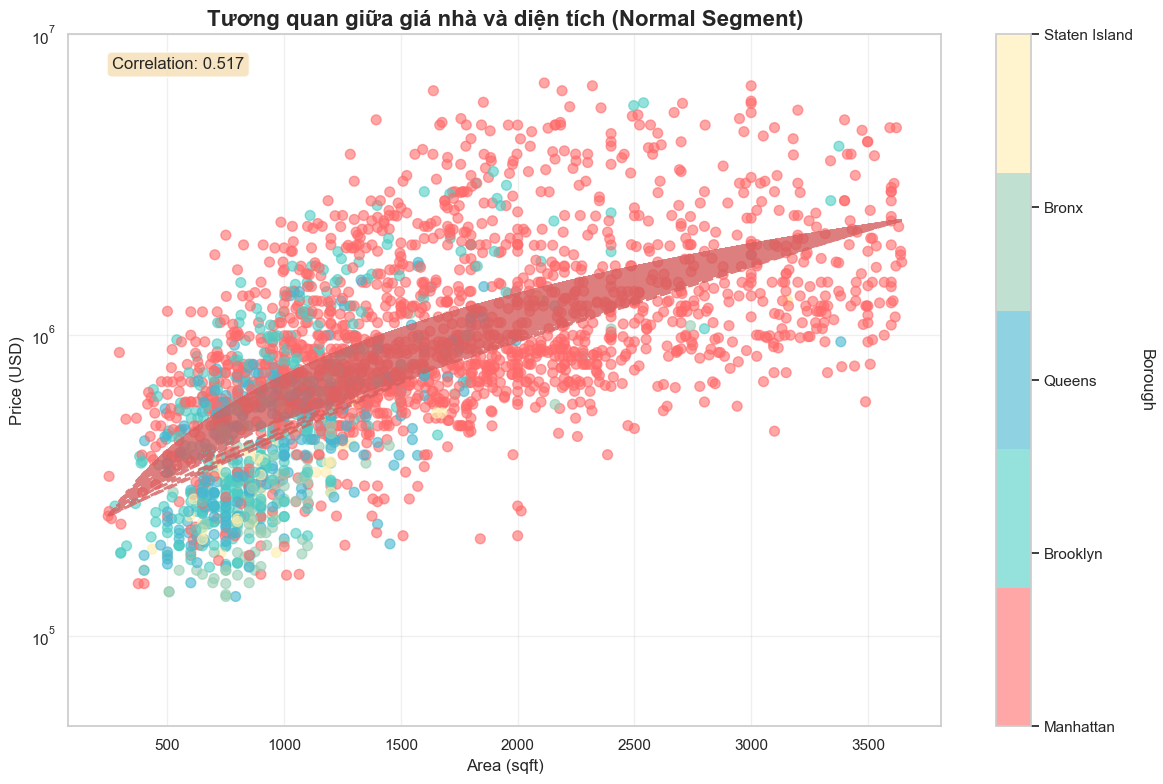

In [123]:
import matplotlib.colors  


# N·∫øu ch·ªâ mu·ªën Manhattan, l·ªçc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # M√†u c·ªë ƒë·ªãnh

df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_normal['PROPERTYSQFT'], df_normal['PRICE'], alpha=0.6, 
                      c=df_normal['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Th√™m ƒë∆∞·ªùng xu h∆∞·ªõng
z = np.polyfit(df_normal['PROPERTYSQFT'], df_normal['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_normal['PROPERTYSQFT'], p(df_normal['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Th√™m h·ªá s·ªë t∆∞∆°ng quan
correlation = df_normal[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Th√™m colorbar v·ªõi nh√£n r·ªùi r·∫°c
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('T∆∞∆°ng quan gi·ªØa gi√° nh√† v√† di·ªán t√≠ch (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

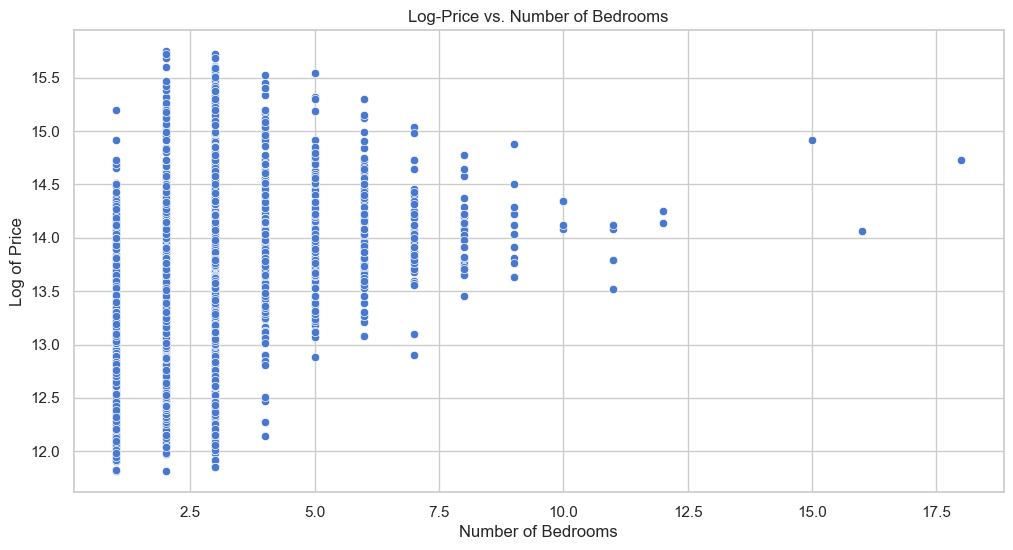

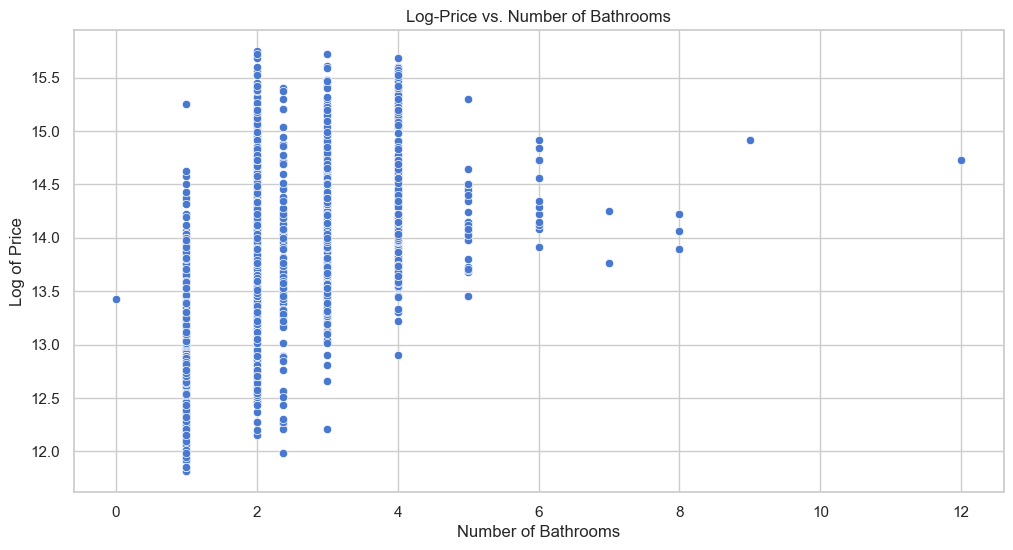

0.37518756743793713 0.5585689997119322


In [126]:
df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])

# Scatter plot for Bedrooms vs Log-transformed Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

# Scatter plot for Bathrooms vs Log-transformed Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

# Calculating correlation coefficients with log-transformed price
beds_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BEDS'])
bath_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [ ]:
import plotly.express as px

fig1 = px.scatter(df_normal, x='BEDS', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BEDS': 'Number of Bedrooms'},
                  title='Price vs. Number of Bedrooms')
fig1.show()

fig2 = px.scatter(df_normal, x='BATH', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BATH': 'Number of Bathrooms'},
                  title='Price vs. Number of Bathrooms')
fig2.show()

S·ªë ph√≤ng l√† y·∫øu t·ªë quan tr·ªçng nh∆∞ng kh√¥ng quy·∫øt ƒë·ªãnh duy nh·∫•t gi√° nh√†.

In [132]:

average_price_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False)

total_listings_per_broker = df_normal['BROKERTITLE'].value_counts()

price_range_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

# Displaying the results
print("C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung v·ªã cao nh·∫•t:")
print(price_range_per_broker.head())

print("\nC√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung b√¨nh cao nh·∫•t:")
print(average_price_per_broker.head())

print("\nC√°c nh√† m√¥i gi·ªõi c√≥ nhi·ªÅu ni√™m y·∫øt nh·∫•t:")
print(total_listings_per_broker.head())

C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung v·ªã cao nh·∫•t:
                                  min      max     median
BROKERTITLE                                              
nest seekers  internationa    5999000  5999000  5999000.0
industrie rential             4895000  4895000  4895000.0
j shayovitz real estate corp  4750000  4750000  4750000.0
onekey mls realmart           4680000  4680000  4680000.0
harbor                        3895000  3895000  3895000.0

C√°c nh√† m√¥i gi·ªõi c√≥ gi√° ni√™m y·∫øt trung b√¨nh cao nh·∫•t:
BROKERTITLE
nest seekers  internationa      5999000.0
industrie rential               4895000.0
j shayovitz real estate corp    4750000.0
onekey mls realmart             4680000.0
core  marketing                 3963333.0
Name: PRICE, dtype: float64

C√°c nh√† m√¥i gi·ªõi c√≥ nhi·ªÅu ni√™m y·∫øt nh·∫•t:
BROKERTITLE
re/max             213
compass            208
corcoran           176
douglas elliman    142
keller williams    118
Name: count, dtype: int64


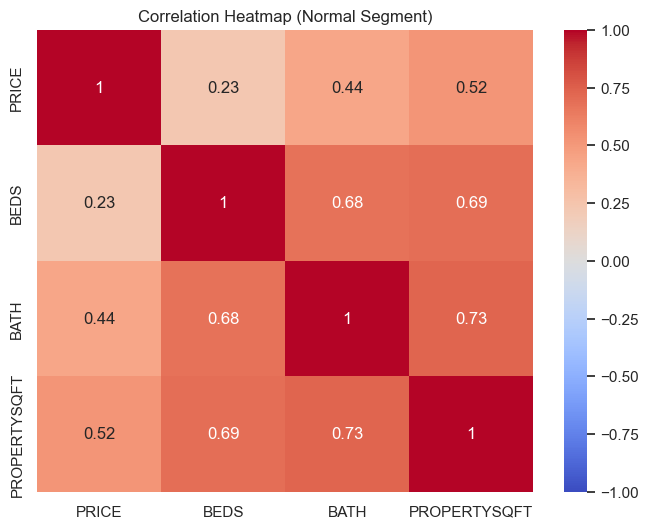

In [91]:
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
df_numeric = df_normal[numeric_cols].dropna()

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
corr_matrix = df_numeric.corr()

# V·∫Ω heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Normal Segment)')
plt.show()


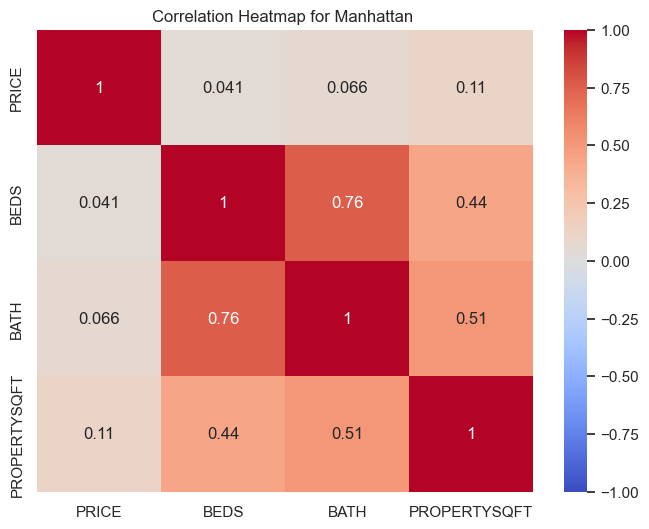

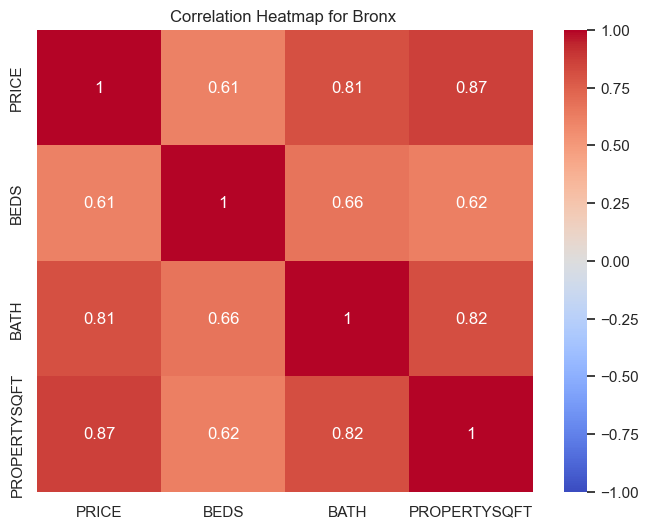

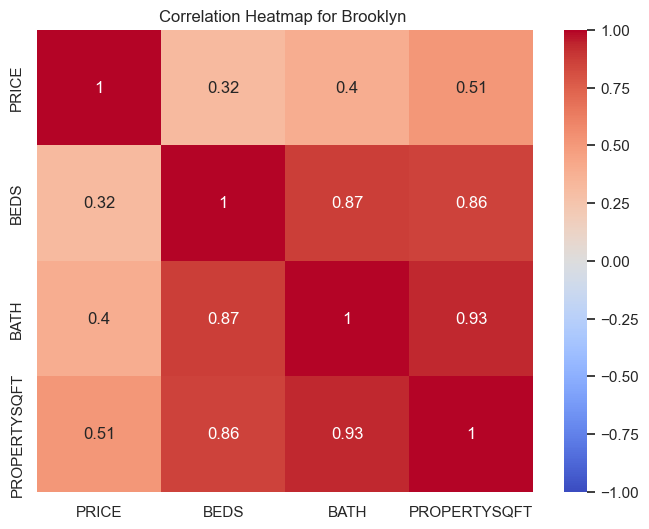

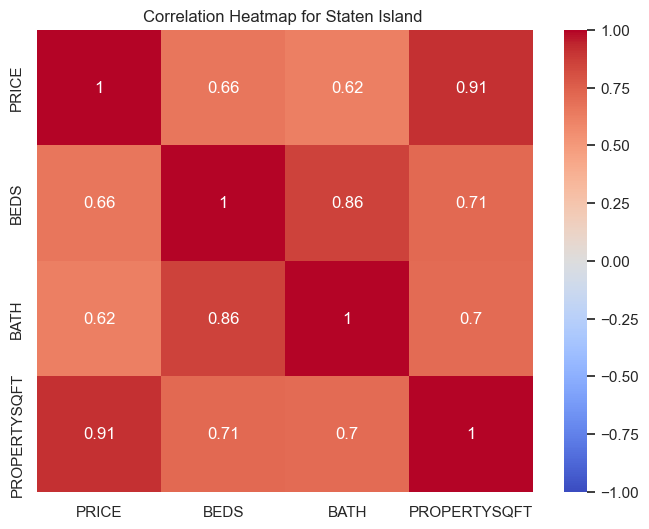

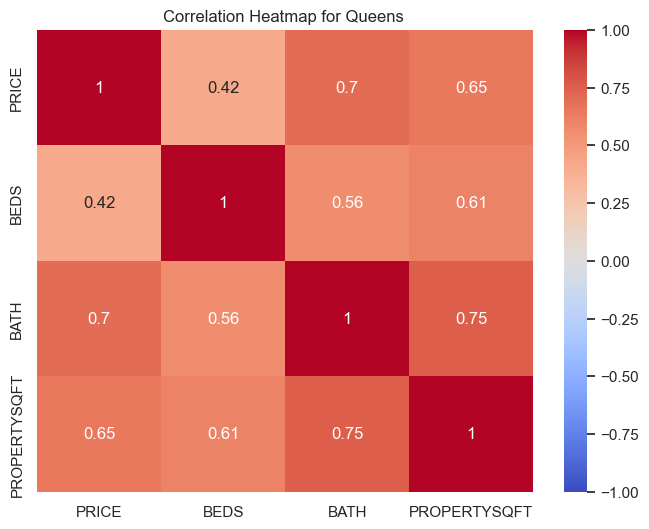

In [92]:
boroughs = df['BOROUGH'].unique()

# V√≤ng l·∫∑p qua t·ª´ng qu·∫≠n ƒë·ªÉ v·∫Ω heatmap
for borough in boroughs:
    # L·ªçc d·ªØ li·ªáu theo qu·∫≠n
    df_borough = df[df['BOROUGH'] == borough]
    
    # Ch·ªçn c√°c c·ªôt s·ªë
    numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
    df_numeric = df_borough[numeric_cols].dropna()  # Lo·∫°i b·ªè gi√° tr·ªã NaN
    
    # T√≠nh ma tr·∫≠n t∆∞∆°ng quan
    corr_matrix = df_numeric.corr()
    
    # V·∫Ω heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap for {borough} ')
    plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df_normal, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12756\1325816498.py:4: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [134]:
df_normal['BROKERTITLE'] = df_normal['BROKERTITLE'].str.replace("Brokered by ", "")

top_brokers = df_normal['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" C√°c nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu theo s·ªë l∆∞·ª£ng ni√™m y·∫øt",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [ ]:
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Gi√° trung b√¨nh c·ªßa c√°c ƒë∆°n v·ªã ƒë∆∞·ª£c m√¥i gi·ªõi b·ªüi 10 nh√† m√¥i gi·ªõi h√†ng ƒë·∫ßu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()

In [ ]:
import plotly.express as px


broker_locality_counts = df_normal.groupby(['BROKERTITLE', 'BOROUGH']).size().reset_index(name='LISTINGS_COUNT')

broker_locality_counts_top_10 = broker_locality_counts[broker_locality_counts['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.bar(broker_locality_counts_top_10, x='BROKERTITLE', y='LISTINGS_COUNT', color='BOROUGH',
             title="Geographical Spread of Top 10 Brokers Across Different Localities",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker', 'BOROUGH': 'Locality'})
fig.show()

In [97]:
# Filtering the dataset for the top 10 brokers
df_top_10_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

# Creating a geospatial map
fig = px.scatter_mapbox(df_top_10_brokers, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="BROKERTITLE", 
                        size="PRICE",
                        hover_data=['PRICE', 'BOROUGH'],
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Geographical Spread of Top 10 Brokers")

# Show the plot
fig.show()
# Analyzing property characteristics for the mentioned top 10 brokers


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12756\1672034819.py:5: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [136]:
df_top_10_brokers_properties = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

broker_property_characteristics_top_10 = df_top_10_brokers_properties.groupby('BROKERTITLE').agg({
    'PROPERTYSQFT': 'mean',  
    'BEDS': 'mean',          
    'BATH': 'mean'          
}).reset_index()

# Displaying the results for the top 10 brokers
print(broker_property_characteristics_top_10)

            BROKERTITLE  PROPERTYSQFT      BEDS      BATH
0  brown harris stevens   1348.136364  2.500000  1.863636
1               compass   1538.625000  2.649038  2.054638
2              corcoran   1320.744318  2.272727  1.887054
3       douglas elliman   1521.056338  2.633803  2.044886
4               e  corp   1162.323529  3.264706  2.316109
5                   exp   1540.523256  3.395349  2.031950
6       keller williams   1517.627119  3.084746  1.997862
7                re/max   1609.948357  3.253521  2.197140
8    robert defalco inc   1827.833333  3.555556  2.398064
9             sotheby's   1754.177778  2.822222  2.261060
